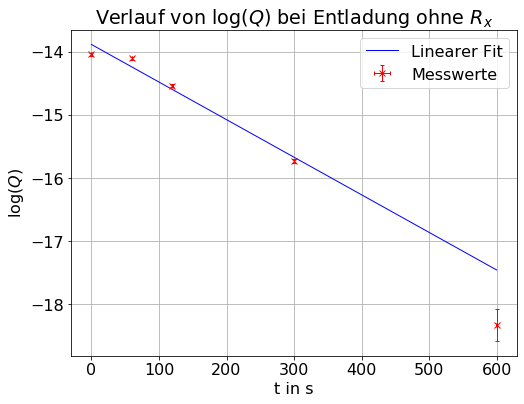

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import statistics as stat
import scipy.optimize 


eps0 = 8.854e-12


##Proportionalitätsfaktor gewichteter Mittelwert
gamma = 0.547e-6
sig_gamma = 0.013e-6




##Entladung ohne Rx
t = np.array([0,1,2,5,10])*60 ##Zeit in s
sig_t = 0.5 ##Fehler in Sekunden inkl Reaktionszeit
skt = np.array([1.46,1.37,0.89,0.27,0.02]) ##Skala
sig_skt = 0.005
Q = skt*gamma ##Ladung
sig_Q = np.sqrt(sig_gamma**2*skt**2+sig_skt**2*gamma**2) ##Fehler der Ladung
sig_logQ = sig_Q/Q


##lineare Regression

def y(m,b,x):
    return m*x+b
popt, pcov = scipy.optimize.curve_fit(y,t,np.log(Q),sigma = sig_logQ, p0=[0,0], absolute_sigma=True)
m = popt[1]
sig_m = np.sqrt(pcov[1][1])

#Plots
plt.figure(figsize=(8,6))
plt.title("Verlauf von $\log(Q)$ bei Entladung ohne $R_x$")
plt.grid()
plt.errorbar(t,np.log(Q),fmt= "x",xerr = sig_t, yerr= sig_logQ,linewidth = 1,color = 'r',ecolor = 'r', label = "Messwerte",capsize = 2)
plt.plot(t, popt[1]*t+popt[0],color = 'b',linewidth=1,label = "Linearer Fit")
plt.ylabel("$\log(Q)$")
plt.xlabel("t in s")
plt.legend(loc = "upper right")


plt.savefig("noRx.png", dpi=200)
plt.show()



##Berechnung des Widerstandes Riso
m = -0.006
n = 65
r = 0.1
d = 0.005
a = np.pi*r**2/d
b = r*(np.log(16*np.pi*r/d)-1)
C = (n-1)*eps0*(a+b) ##Kapazität

Riso = -1/(C*m)



[1.96908665e-08 1.77361439e-08 9.66408744e-09 7.77680043e-09
 6.80115828e-09 5.43180210e-09 3.03384146e-09 2.81730385e-09
 2.73512358e-09]
[8.20500e-07 7.37356e-07 3.90011e-07 3.06320e-07 2.62013e-07 1.97467e-07
 5.52470e-08 2.84440e-08 1.09400e-09]
[0.02399862 0.02405371 0.02477901 0.02538783 0.02595733 0.02750739
 0.05491414 0.09904739 2.50011296]


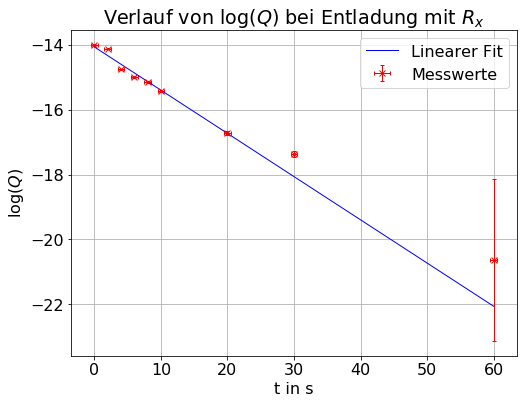

1930137985.7747703 43536947.0475512
2027843446.2831626 60888172.823174246


In [5]:
###Entladung mit Rx

t = np.array([0,2,4,6,8,10,20,30,60]) ##Zeit in s
sig_t = 0.5 ##Fehler in Sekunden inkl Reaktionszeit
skt = np.array([1.5,1.348,0.713,0.56,0.479,0.361,0.101,0.052,0.002]) ##Skala
sig_skt = 0.005
Q = skt*gamma ##Ladung
sig_Q = np.sqrt(sig_gamma**2*skt**2+sig_skt**2*gamma**2) ##Fehler der Ladung
sig_logQ = sig_Q/Q
print(sig_Q)
print(Q)
print(sig_logQ)

##lineare Regression

def y(m,b,x):
    return m*x+b
popt, pcov = scipy.optimize.curve_fit(y,t,np.log(Q),sigma = sig_logQ, p0=[0,0], absolute_sigma=True)
m = popt[1]
sig_m = np.sqrt(pcov[1][1])

#Plots
plt.figure(figsize=(8,6))
plt.title("Verlauf von $\log(Q)$ bei Entladung mit $R_x$")
plt.grid()
plt.errorbar(t,np.log(Q),fmt= "x",xerr = sig_t, yerr= sig_logQ,linewidth = 1,color = 'r',ecolor = 'r', label = "Messwerte",capsize = 2)
plt.plot(t, popt[1]*t+popt[0],color = 'b',linewidth=1,label = "Linearer Fit")
plt.ylabel("$\log(Q)$")
plt.xlabel("t in s")
plt.legend(loc = "upper right")


plt.savefig("Rx.png", dpi=200)
plt.show()



##Berechnung des Gesamtwiderstandes
m = -0.133
sig_m = 0.003
Rg = -1/(C*m)
sig_Rg = sig_m*1/(C*m**2)
print(Rg,sig_Rg)

##Berechnung von Rx
Riso = 4e10
sig_Riso = 1e10
Rg = 193e7
sig_Rg = 5e7
a = (Riso-Rg)**4

Rx = Riso*Rg/(Riso-Rg)
sig_Rx = np.sqrt(sig_Riso**2*Rg**4/a+sig_Rg**2*Riso**4/a)

print(Rx,sig_Rx)